# **Data Load**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
# Mount your Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Read the dataset from the specified path
df = pd.read_csv('/content/drive/MyDrive/ML project/preprocess_text_Spacy_Nltk.csv', sep=',', encoding='utf-8', quotechar='"')
df.head()

,text,type,processed_Text
0,WASHINGTON (Reuters) - The head of a conservat...,True,washington reuter head conservative republic...
1,WASHINGTON (Reuters) - Transgender people will...,True,washington reuters transgender people allow ...
2,WASHINGTON (Reuters) - The special counsel inv...,True,washington reuter special counsel investigat...
3,WASHINGTON (Reuters) - Trump campaign adviser ...,True,washington reuters trump campaign adviser ge...
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,True,seattlewashington reuters president donald t...


In [ ]:
!pip install gensim
import gensim.downloader as api

# Load the pre-trained Word2Vec model
word2vec_model = api.load("word2vec-google-news-300")


[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
import numpy as np

# Function to convert text to vector representation
def text_to_vector(text):
    vectors = []
    for word in text.split():
        if word in word2vec_model:
            vectors.append(word2vec_model[word])
    if vectors:
        # Compute the mean along each dimension to get a single vector representation
        vector = np.mean(vectors, axis=0)
    else:
        # If no word vectors found, return a zero vector
        vector = np.zeros_like(word2vec_model.vector_size)
    return vector

# Apply the function to the processed_text column
df['vector'] = df['processed_Text'].apply(text_to_vector)

# Display the DataFrame after adding the vector column
df.head()

,text,type,processed_Text,vector
0,WASHINGTON (Reuters) - The head of a conservat...,True,washington reuter head conservative republic...,"[0.024919955, 0.009890609, 0.025893753, 0.1429..."
1,WASHINGTON (Reuters) - Transgender people will...,True,washington reuters transgender people allow ...,"[-0.05096761, 0.02822113, 0.04166546, 0.084022..."
2,WASHINGTON (Reuters) - The special counsel inv...,True,washington reuter special counsel investigat...,"[-0.026765054, 0.018162979, 0.027232489, 0.057..."
3,WASHINGTON (Reuters) - Trump campaign adviser ...,True,washington reuters trump campaign adviser ge...,"[-0.04060308, 0.0010630024, 0.017972376, 0.027..."
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,True,seattlewashington reuters president donald t...,"[0.010694961, 0.0110310195, -0.033929564, 0.08..."


# Models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure all values in the 'vector' column are lists
df['vector'] = df['vector'].apply(lambda x: x if isinstance(x, list) else [x])

# Get the maximum length of vectors
max_len = max(len(vec) for vec in df['vector'])

# Pad the vectors to ensure they all have the same length
X_train = np.array([vec + [0] * (max_len - len(vec)) for vec in df['vector']])
y_train = df['type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# List of classifiers to compare
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Multinomial Naive Bayes": MultinomialNB()
}

# Iterate over each classifier
for name, classifier in classifiers.items():
    print(f"--- {name} ---")

    # Train the model on the training data
    classifier.fit(X_train, y_train)

    # Predict on the testing data
    y_pred = classifier.predict(X_test)

    # Print the classification report
    print(classification_report(y_test, y_pred))

    # Print the confusion matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (44898, 1) + inhomogeneous part.

In [ ]:
# Iterate over each classifier
for name, classifier in classifiers.items():
    # Predict on the testing data
    y_pred = classifier.predict(X_test)

    # Print the confusion matrix
    print("Confusion Matrix for", name, ":")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)



Confusion Matrix for Logistic Regression :
[[4650    0]
 [4330    0]]
Confusion Matrix for Random Forest :
[[3510 1140]
 [2222 2108]]
Confusion Matrix for Decision Tree :
[[3549 1101]
 [2253 2077]]
Confusion Matrix for Support Vector Machine :
[[3673  977]
 [2439 1891]]
Confusion Matrix for Gradient Boosting :
[[3442 1208]
 [2023 2307]]
Confusion Matrix for Multinomial Naive Bayes :
[[4650    0]
 [4330    0]]


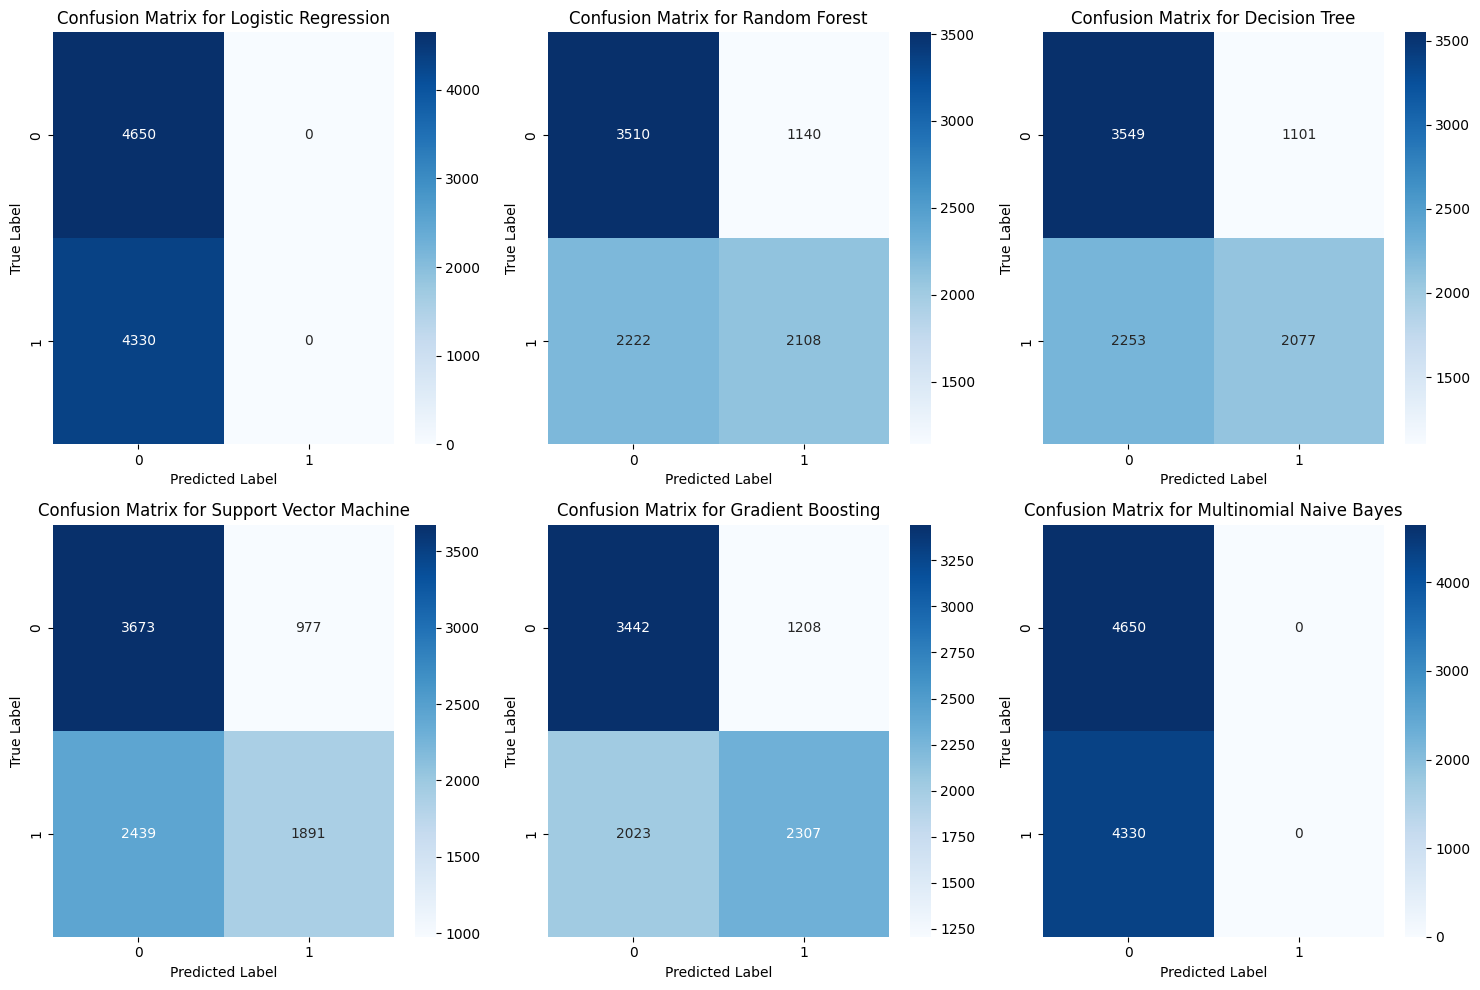

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of rows and columns for subplots
num_rows = 2
num_cols = len(classifiers) // num_rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes if necessary
if num_rows > 1 and num_cols > 1:
    axes = axes.flatten()
else:
    axes = [axes]

# Iterate over each classifier
for i, (name, classifier) in enumerate(classifiers.items()):
    # Predict on the testing data
    y_pred = classifier.predict(X_test)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", ax=axes[i])
    axes[i].set_title(f"Confusion Matrix for {name}")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

# Adjust layout
plt.tight_layout()
plt.show()

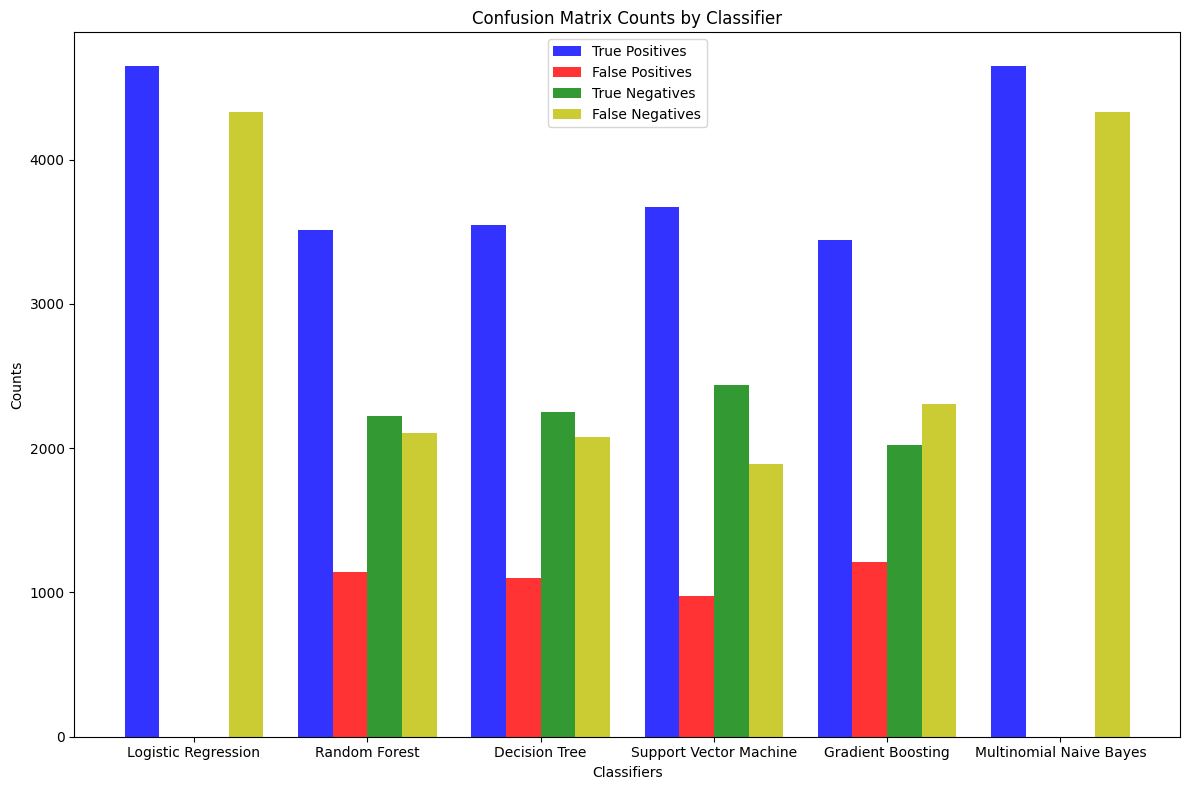

In [1]:
import matplotlib.pyplot as plt
# Define the data
classifiers = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Support Vector Machine', 'Gradient Boosting', 'Multinomial Naive Bayes']
true_positives = [4650, 3510, 3549, 3673, 3442, 4650]
false_positives = [0, 1140, 1101, 977, 1208, 0]
true_negatives = [0, 2222, 2253, 2439, 2023, 0]
false_negatives = [4330, 2108, 2077, 1891, 2307, 4330]

# Create subplots
fig, ax = plt.subplots(figsize=(12, 8))

# Plot bars for each classifier
bar_width = 0.2
index = range(len(classifiers))
opacity = 0.8

plt.bar(index, true_positives, bar_width, alpha=opacity, color='b', label='True Positives')
plt.bar([i + bar_width for i in index], false_positives, bar_width, alpha=opacity, color='r', label='False Positives')
plt.bar([i + 2*bar_width for i in index], true_negatives, bar_width, alpha=opacity, color='g', label='True Negatives')
plt.bar([i + 3*bar_width for i in index], false_negatives, bar_width, alpha=opacity, color='y', label='False Negatives')

plt.xlabel('Classifiers')
plt.ylabel('Counts')
plt.title('Confusion Matrix Counts by Classifier')
plt.xticks([i + 1.5*bar_width for i in index], classifiers)
plt.legend()

plt.tight_layout()
plt.show()
